#ALUMNO SEBASTIAN ARIEL MERAGELMAN
32561804


Consignas:
Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link
Hacer un fork de este repositorio y trabajar sobre ese archivo
1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver.

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.

#El problema a resolver requiere una máquina de vector de soporte o SVM

Se importan las librerias

In [36]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Para generar los datos usaremos las funciones provistas en sklearn
sklearn.datasets: Datasets

se cargan los datos correspondientes



In [3]:

!pip install xlrd --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [75]:
import pandas as pd
import requests
import openpyxl

url = "https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_11_22.xls"


resp = requests.get(url)
with open('indec2.xls', 'wb') as output:
    output.write(resp.content)

pd_indec= pd.read_excel("indec2.xls")
pd_indec=pd_indec.dropna()
pd_indec.columns = pd_indec.iloc[0]
pd_indec.columns = [str(i)[0:7] for i in pd_indec.columns]
pd_indec = pd_indec[2:14]


In [80]:

pd_indec.head()

,Total n,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,...,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10
9,Alimentos y bebidas no alcohólicas,1.3,1.8,2.8,2.2,1.3,0.9,1.1,2.1,1.8,...,4.9,7.5,7.2,5.9,4.4,4.6,6,7.1,6.7,6.2
10,Bebidas alcohólicas y tabaco,0.9,4.3,1.9,2.4,1.7,0.7,3,1.3,0.7,...,1.8,2.7,5.7,3.3,5.7,6.7,6.4,7,9.4,5.4
11,Prendas de vestir y calzado,-1,-0.2,3.4,4.5,1.7,0.9,-1.2,-0.6,3.8,...,2.4,3.4,10.9,9.9,5.8,5.8,8.5,9.9,10.6,6.8
12,"Vivienda, agua, electricidad, gas y otros comb...",1.5,5.4,3.6,5.9,1.8,1.8,2,2.2,2,...,1.8,2.8,7.7,4.6,3.6,6.8,4.6,5.5,3.1,7.5
13,Equipamiento y mantenimiento del hogar,0.9,0.4,0.8,1.1,2.8,1.3,2.4,1,1,...,3.3,4.4,4.4,5.5,5.4,6,10.3,8.4,6,4.9


In [84]:
pd_indec=pd_indec.T
pd_indec.columns = pd_indec.iloc[0]
pd_indec=pd_indec[1:]
pd_indec=pd_indec[['Alimentos y bebidas no alcohólicas','Transporte','Prendas de vestir y calzado']]
pd_indec

Total n,Alimentos y bebidas no alcohólicas,Transporte,Prendas de vestir y calzado
2017-01,1.3,2.1,-1
2017-02,1.8,1.9,-0.2
2017-03,2.8,1.2,3.4
2017-04,2.2,0.6,4.5
2017-05,1.3,0.9,1.7
...,...,...,...
2022-06,4.6,4.7,5.8
2022-07,6,5.5,8.5
2022-08,7.1,6.8,9.9
2022-09,6.7,5.8,10.6


In [85]:

for i in pd_indec.columns:
  pd_indec[i] = pd_indec[i].astype(float)

pd_indec.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 2017-01 to 2022-10
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Alimentos y bebidas no alcohólicas  70 non-null     float64
 1   Transporte                          70 non-null     float64
 2   Prendas de vestir y calzado         70 non-null     float64
dtypes: float64(3)
memory usage: 2.2+ KB


In [88]:
# División de los datos en train y test
# ==============================================================================
X = pd_indec.drop(columns = 'Prendas de vestir y calzado')
y = pd_indec['Prendas de vestir y calzado']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [89]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()

y_train=lab_enc.fit_transform(y_train)

# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)



SVC(C=100, kernel='linear', random_state=123)

ValueError: ignored

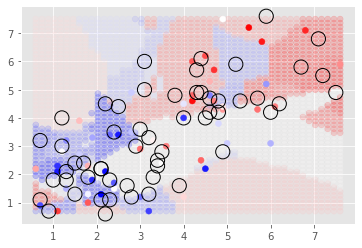

In [94]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.Transporte), np.max(X_train.Transporte), 50)
y = np.linspace(np.min(X_train['Alimentos y bebidas no alcohólicas']), np.max(X_train['Alimentos y bebidas no alcohólicas']), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.Transporte, X_train['Alimentos y bebidas no alcohólicas'], c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [95]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([ 2, 20,  2, 25,  0, 25, 36, 38, 27, 29, 20,  6, 20, 30])

In [100]:
from sklearn.metrics import mean_squared_error
# Error de test (rmse)
# ==============================================================================
y_test=lab_enc.fit_transform(y_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

17.649362594722792

In [101]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 7.142857142857142%


#Problema resuelto desde modelo de árbol de desición clasificador


In [102]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [103]:
# Clasificación
# ==============================================================================
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [118]:
# Creación del modelo
# ==============================================================================
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
        )             
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
# ==============================================================================
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = pd_indec.select_dtypes(include=['float64', 'int']).corr(method='pearson')

tidy_corr_matrix(pd_indec).head(10)

,variable_1,variable_2,r,abs_r
188,2022-03,Prendas de vestir y calzado,10.9,10.9
152,2021-03,Prendas de vestir y calzado,10.8,10.8
206,2022-09,Prendas de vestir y calzado,10.6,10.6
61,2018-09,Transporte,10.4,10.4
191,2022-04,Prendas de vestir y calzado,9.9,9.9
203,2022-08,Prendas de vestir y calzado,9.9,9.9
62,2018-09,Prendas de vestir y calzado,9.8,9.8
98,2019-09,Prendas de vestir y calzado,9.5,9.5
200,2022-07,Prendas de vestir y calzado,8.5,8.5
64,2018-10,Transporte,7.6,7.6


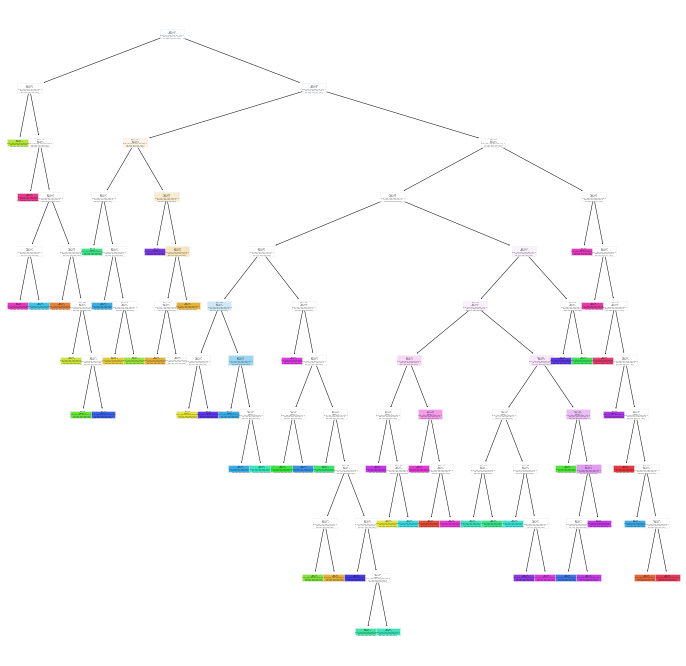

Profundidad del árbol: 11
Número de nodos terminales: 55


In [119]:
# Visualización del árbol creado
# ==============================================================================
plt.figure(figsize=(12,12))  
tree.plot_tree(clf, filled=True)
plt.show()

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

In [120]:
# neg_root_mean_squared_error de test
# ==============================================================================

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

17.649362594722792

In [121]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1


In [122]:
# Accuracy de test del modelo 
# ==============================================================================
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"El accuracy de test es: {100*accuracy}%")

El accuracy de test es: 7.142857142857142%


En ninguno de los modelos se puede obtener una tasa de accuracy aceptable, esto puede ser por un mal diseño del modelo de entrenamiento o por una falta de relacion entre las variables predictoras y la variable objetivo

Lo que nos lleva a considerar que podria (de estar bien realizada la investigación)  no existir una relación entre la variación del costo del transporte + la variación del costo de los alimentos  y la variación de precio de la indumentaria